# Comparing Gradient Descend and Newton-Raphson methods to find minima

when function is x**2 + 6*x, initial guess = 3 and stepsize = 0.2 and tolerance = 0.01
minima of fn by gradient descent method is -2.98693930598400
After 11 steps
minima of fn by newton-raphson method is -3.00000000000000
after 1  steps


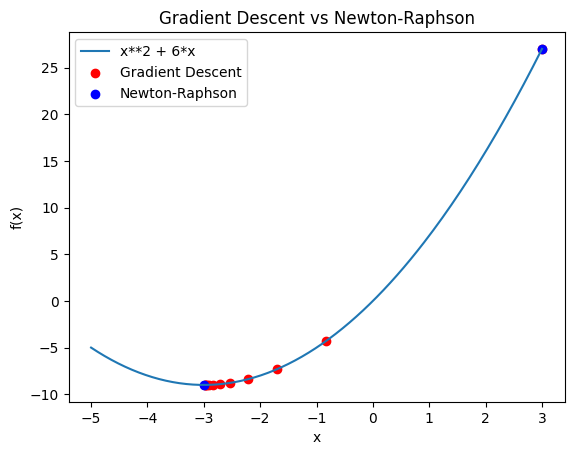

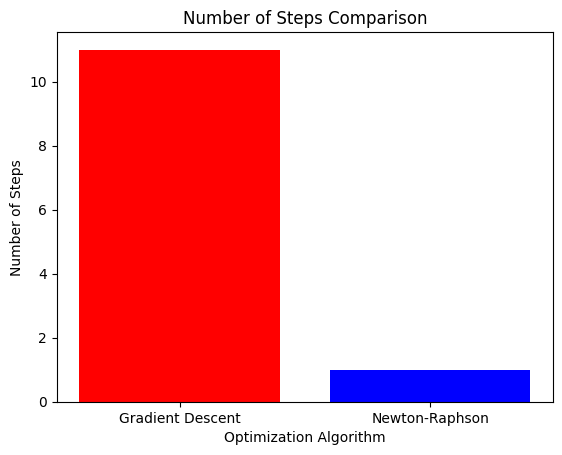

In [12]:
#importing the required modules
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

#here is our function
x=symbols('x')
fn=x**2 + 6*x

#inputs for all the functions
initial_guess=3
stepsize=0.2             #stepsize is just for gradient descent
tolerance=0.01
print(f"when function is {fn}, initial guess = {initial_guess} and stepsize = {stepsize} and tolerance = {tolerance}")

#value of function at different x
def fn_value(n):
    return fn.evalf(subs={x:n})  # evalf gives value of function substituting x with the argument n


#taking x and y values for graph ploting
x_values=np.linspace(-5, 3, 200)
y_values=[fn_value(x) for x in x_values]


#Gradient Descent method
x_ini=initial_guess
fn_diff=diff(fn, x)
reslt_gredesc=[x_ini]     # new generated x will be stored in this list
slope=fn_diff.evalf(subs={x:x_ini})
x_fin=x_ini-(slope*stepsize)          #formula for finding next x in gradient descent
gd_steps=0
while abs(x_fin-x_ini)>tolerance:
    gd_steps+=1
    x_ini=x_fin
    slope=fn_diff.evalf(subs={x:x_ini})
    x_fin=x_ini-(slope*stepsize)
    reslt_gredesc.append(x_fin)
print("minima of fn by gradient descent method is",x_fin)    
print("After",gd_steps,"steps")

# Newton-Raphson method
x_ini=initial_guess
gn=diff(fn,x)    #derivative of original function
reslt_newtrap=[x_ini]    # new generated x will be stored in this list
slop=diff(gn,x).evalf(subs={x:x_ini})
x_fin=x_ini-(gn.evalf(subs={x:x_ini}))/slop     #formula for finding next x in newton-raphson
nr_step=0
while abs(x_ini-x_fin)>tolerance:
    nr_step+=1
    x_ini=x_fin
    slop=diff(gn,x).evalf(subs={x:x_ini})
    x_fin=x_ini-(gn.evalf(subs={x:x_ini}))/slop
    reslt_newtrap.append(x_fin)
print("minima of fn by newton-raphson method is",x_fin)    
print("after",nr_step," steps")


#ploating the graph
plt.plot(x_values, y_values, label=fn)
plt.scatter(reslt_gredesc, [fn_value(x) for x in reslt_gredesc], c='red', label='Gradient Descent')
plt.scatter(reslt_newtrap, [fn_value(x) for x in reslt_newtrap], c='blue', label='Newton-Raphson')
plt.title('Gradient Descent vs Newton-Raphson')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

# Bar graph for the number of steps
algorithms = ['Gradient Descent', 'Newton-Raphson']
steps = [gd_steps, nr_step]
plt.bar(algorithms, steps, color=['red', 'blue'])
plt.title('Number of Steps Comparison')
plt.xlabel('Optimization Algorithm')
plt.ylabel('Number of Steps')
plt.show()
